In [11]:
import pandas as pd

#Load the dataset 
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [13]:
# Display first few rows of both datasets to understand the structure
train_data.head(), test_data.head()

(           Date     Open     High      Low    Close         Volume  \
 0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
 1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
 2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
 3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
 4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   
 
        Market Cap  
 0  45,535,800,000  
 1  44,890,700,000  
 2  46,246,700,000  
 3  44,144,400,000  
 4  41,816,500,000  ,
            Date     Open     High      Low    Close         Volume  \
 0  Aug 07, 2017  3212.78  3397.68  3180.89  3378.94  1,482,280,000   
 1  Aug 06, 2017  3257.61  3293.29  3155.60  3213.94  1,105,030,000   
 2  Aug 05, 2017  2897.63  3290.01  2874.83  3252.91  1,945,700,000   
 3  Aug 04, 2017  2806.93  2899.33  2743.72  2895.89  1,002,120,000   
 4  Aug 03, 2017  2709.56  2813.31  2685.14  2804.73    804,797,000   
 
        Market Ca

In [23]:
# Replace invalid entries ('-') with NaN
train_data['Volume'] = pd.to_numeric(train_data['Volume'].str.replace(',', ''), errors='coerce')
train_data['Market Cap'] = pd.to_numeric(train_data['Market Cap'].str.replace(',', ''), errors='coerce')
test_data['Volume'] = pd.to_numeric(test_data['Volume'].str.replace(',', ''), errors='coerce')
test_data['Market Cap'] = pd.to_numeric(test_data['Market Cap'].str.replace(',', ''), errors='coerce')

# Re-check for missing values
missing_values_cleaned = train_data.isnull().sum()

# Descriptive statistics of the training dataset after cleaning
train_stats_cleaned = train_data.describe()



In [25]:
# Dropping rows with missing 'Volume' data
train_data_cleaned = train_data.dropna(subset=['Volume'])

# Showing the updated descriptive statistics for the cleaned dataset
train_stats_after_dropping = train_data_cleaned.describe()

# Display the cleaned training dataset stats 
display(train_stats_after_dropping)

# Return the count of missing values after dropping missing rows
missing_values_after_dropping = train_data_cleaned.isnull().sum()

# Show the missing values count 
display(missing_values_after_dropping)

,Date,Open,High,Low,Close,Volume,Market Cap
count,1313,1313.000000,1313.000000,1313.000000,1313.000000,1.313000e+03,1.313000e+03
mean,2015-10-14 00:00:00,645.102285,660.689474,630.430274,646.565819,1.481643e+08,9.765525e+09
min,2013-12-27 00:00:00,176.900000,211.730000,171.510000,178.100000,2.857830e+06,2.427830e+09
25%,2014-11-20 00:00:00,327.580000,334.660000,320.480000,327.920000,2.071070e+07,4.593400e+09
50%,2015-10-14 00:00:00,463.550000,478.620000,454.940000,463.620000,4.530140e+07,6.729120e+09
75%,2016-09-06 00:00:00,688.000000,705.260000,669.590000,688.310000,9.037880e+07,1.033890e+10
max,2017-07-31 00:00:00,2953.220000,2999.910000,2840.530000,2958.110000,2.569530e+09,4.839120e+10
std,NaN,535.041809,556.127598,517.124878,538.203788,3.242987e+08,8.975974e+09


Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

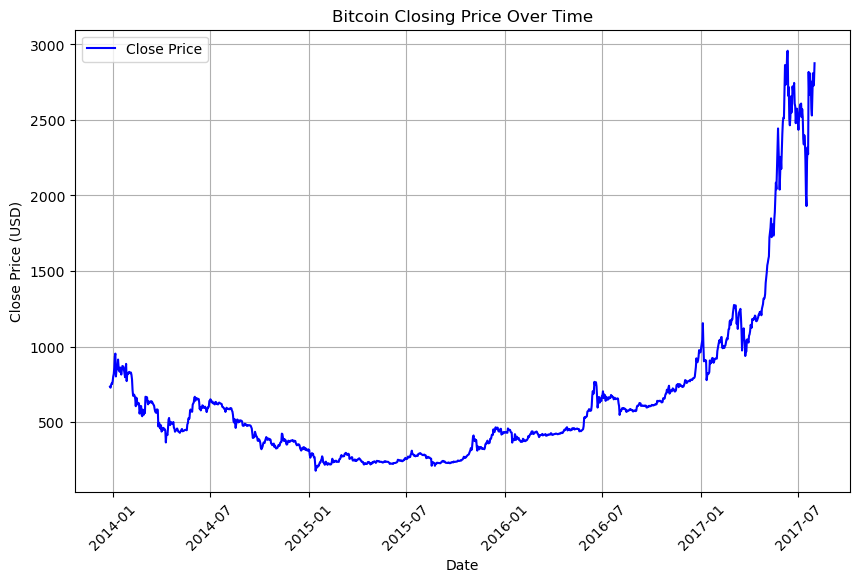

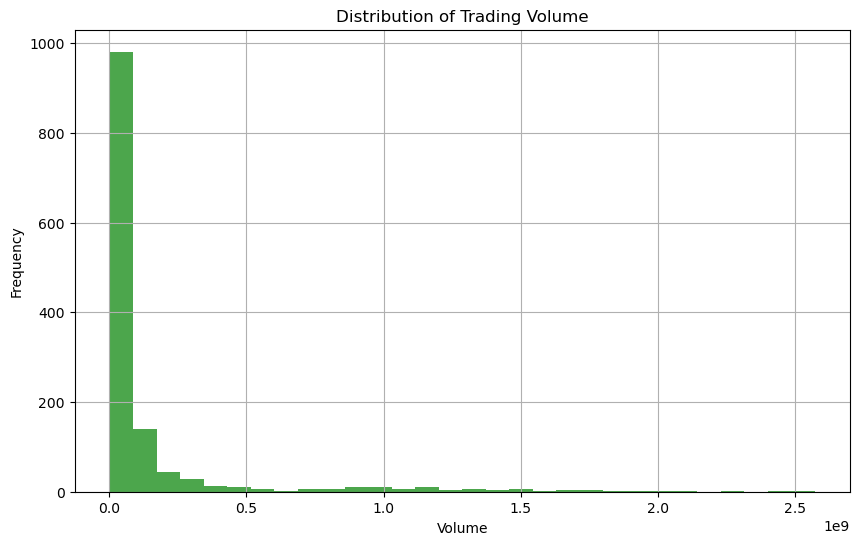

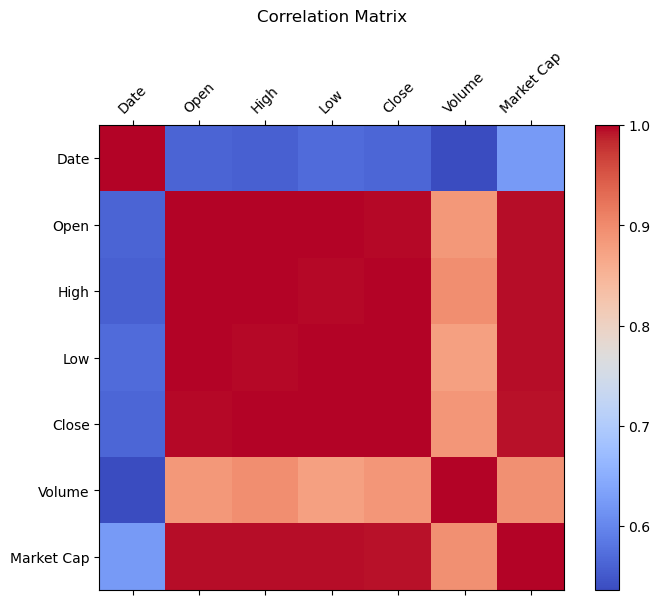

,Date,Open,High,Low,Close,Volume,Market Cap
Date,1.000000,0.562854,0.558899,0.569447,0.564896,0.536467,0.624000
Open,0.562854,1.000000,0.998608,0.998505,0.997699,0.884873,0.996257
High,0.558899,0.998608,1.000000,0.997759,0.998680,0.895735,0.994823
Low,0.569447,0.998505,0.997759,1.000000,0.998936,0.876867,0.995247
Close,0.564896,0.997699,0.998680,0.998936,1.000000,0.886549,0.994288
Volume,0.536467,0.884873,0.895735,0.876867,0.886549,1.000000,0.894608
Market Cap,0.624000,0.996257,0.994823,0.995247,0.994288,0.894608,1.000000


In [27]:
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(train_data_cleaned['Date'], train_data_cleaned['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot distribution of Volume
plt.figure(figsize=(10, 6))
plt.hist(train_data_cleaned['Volume'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = train_data_cleaned.corr()
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.title('Correlation Matrix', pad=20)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

correlation_matrix


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and target (y)
X = train_data_cleaned[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = train_data_cleaned['Close']

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

mse, r2


(168.1082484819248, 0.9994269947938497)

In [31]:


# The test data already has 'Volume' and 'Market Cap' in numeric format, so we will drop rows with missing 'Volume' if any
test_data_cleaned = test_data.dropna(subset=['Volume'])

# Define features for the test dataset (X_test)
X_test = test_data_cleaned[['Open', 'High', 'Low', 'Volume', 'Market Cap']]

# Predict the closing prices on the test dataset
y_test_pred = model.predict(X_test)

# Add predictions to the test dataset for comparison
test_data_cleaned['Predicted Close'] = y_test_pred

# Display the first few rows of the test data with predicted values
test_data_cleaned[['Date', 'Open', 'High', 'Low', 'Volume', 'Market Cap', 'Predicted Close']].head()


,Date,Open,High,Low,Volume,Market Cap,Predicted Close
0,2017-08-07,3212.78,3397.68,3180.89,1482280000,52987300000,3324.216679
1,2017-08-06,3257.61,3293.29,3155.60,1105030000,53720900000,3216.138429
2,2017-08-05,2897.63,3290.01,2874.83,1945700000,47778200000,3143.930973
3,2017-08-04,2806.93,2899.33,2743.72,1002120000,46276200000,2829.376258
4,2017-08-03,2709.56,2813.31,2685.14,804797000,44666400000,2769.220797


In [33]:
# Evaluate the model on the test data by calculating the mean squared error and R-squared score
y_test_actual = test_data_cleaned['Close']

# Calculate Mean Squared Error and R-squared
test_mse = mean_squared_error(y_test_actual, y_test_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

test_mse, test_r2


(3301.997803878608, 0.950324659812606)